# A Basic Analysis of Climate Trends

## Thanks for reading this simple exploratory data analysis! This code was written for CSCI 4502: Data Mining at CU Boulder.

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Data Cleaning

In [2]:
# Reading in datsets
nasaCO2 = pd.read_csv("NASA_co2.txt", '\s+')
nasaSeaIce = pd.read_csv("NASA_seaicemin.csv")
nasaTemp = pd.read_csv("Monthly_Temperatures.csv")

The NASA temperature dataset has multiple sensor sources, so one of the sensor sources can be excluded.

In [3]:
# Cleaning NASA temperature anomaly data, so that there is only one source being used
nasaTempClean = nasaTemp.query('Source == "GCAG"').iloc[::-1]
nasaTempClean['Year'] = pd.DatetimeIndex(nasaTempClean['Date']).year
nasaTempClean = nasaTempClean.drop_duplicates(subset = ['Year'])
nasaCO2Clean = nasaCO2.query('`(Year)` == 7') # July CO2 measurements, peak measurements

Selecting features from the datasets. These pairs of columns will be plotted.

In [4]:
# Dataset goes from 1979 to 2020
# Measured in million square kilometers
seaiceX = nasaSeaIce['year']
seaiceY = nasaSeaIce['area']
# Dataset goes from 1958 to 2020
# 12 data points for every year, isolated 1 data point for year (July)
# monthly average is measured in PPM (parts per million)
co2Y = nasaCO2Clean['(monthlyaverage)']
co2X = nasaCO2Clean.index
# NASA temperature anomaly data, goes from 1880 to 2016
tempX = nasaTempClean['Year']
tempY = nasaTempClean['Mean']

## Initial Plots

Plotting the NASA carbon dioxide emission data

Mean:  355.7265079365078
Median:  353.3


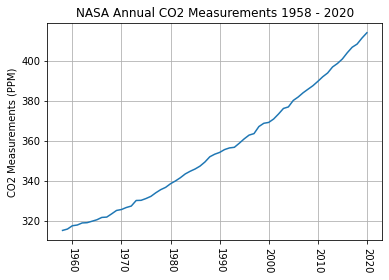

In [5]:
# Plot of NASA CO2 data over years from 1958 to 2020
plt.title("NASA Annual CO2 Measurements 1958 - 2020")
plt.ylabel("CO2 Measurements (PPM)")
plt.tick_params(axis = "x", labelrotation = 270)
plt.grid(True)
plt.plot(co2X, co2Y)

# Plot CO2 data rate of change
# Some central tendency data
print("Mean: ", co2Y.mean())
print("Median: ", co2Y.median())

Plotting the NOAA temperature anomaly (difference from average temperature of 1880)

Mean:  0.036807299270072924
Median:  -0.0241


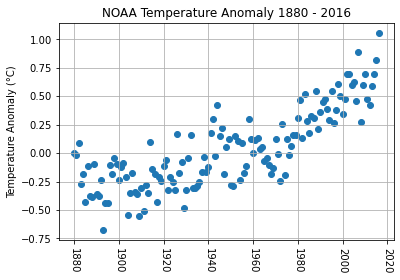

In [6]:
plt.title("NOAA Temperature Anomaly 1880 - 2016")
plt.ylabel("Temperature Anomaly (\u00B0C)")
plt.tick_params(axis = "x", labelrotation = 270)
plt.grid(True)
plt.scatter(tempX, tempY)

# Some central tendency data
print("Mean: ", tempY.mean())
print("Median: ", tempY.median())

Plot of NASA Sea Ice minimum data from 1979 to 2020, including a linear trend line

Mean:  4.153809523809523
Median:  4.295


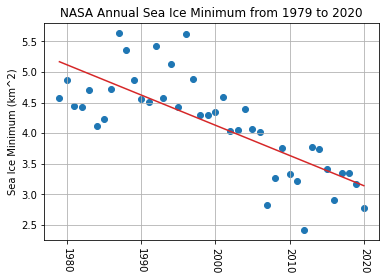

In [7]:
plt.title("NASA Annual Sea Ice Minimum from 1979 to 2020")
plt.ylabel("Sea Ice Minimum (km^2)")
plt.grid(True)
plt.tick_params(axis = "x", labelrotation = 270)
plt.scatter(seaiceX, seaiceY)

# Linear Regression for Sea Ice Minimum data
LRseaiceX = np.array(seaiceX).reshape(-1,1)
model = LinearRegression()
model.fit(LRseaiceX, seaiceY)
plt.plot(seaiceX, model.predict(LRseaiceX), color='tab:red')

# Some central tendency data
print("Mean: ", seaiceY.mean())
print("Median: ", seaiceY.median())

## Finding the Rate of Change of Carbon Dioxide Emissions

This next cell creates a list of the first and second derivatives of the carbon dioxide dataset.

In [8]:
# 1st Derivative
firstDer = []

for i in range(len(co2Y) - 1):
    firstDer.append( (co2Y.iloc[i+1] - co2Y.iloc[i]) / 1)

# 2nd Derivative
secondDer = []
    
for i in range(len(firstDer) - 1):
    secondDer.append( (firstDer[i+1] - firstDer[i]) / 1)

Plotting the first derivative

Mean 0    1.594677
dtype: float64


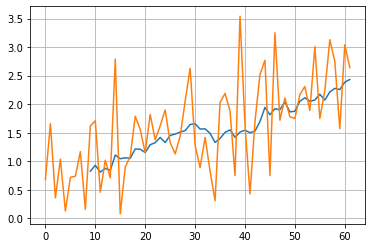

In [9]:
firstDer = pd.DataFrame(firstDer)

plt.grid(True)
plt.plot(firstDer.rolling(10).mean())
plt.plot(firstDer)
print("Mean", firstDer.mean())

Plotting the second derivative

Mean 0    0.032131
dtype: float64


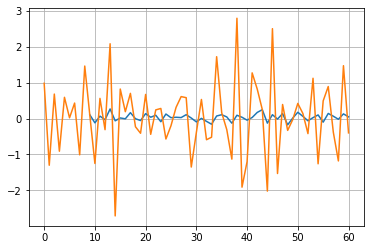

In [10]:
# Uses rolling mean to find a more consistent value of the second derivative of CO2 emissions graph
secondDer = pd.DataFrame(secondDer)

plt.grid(True)
plt.plot(secondDer.rolling(10).mean())
plt.plot(secondDer)
print("Mean", secondDer.mean())

## Carbon Dioxide and Temperature Anomaly Plot

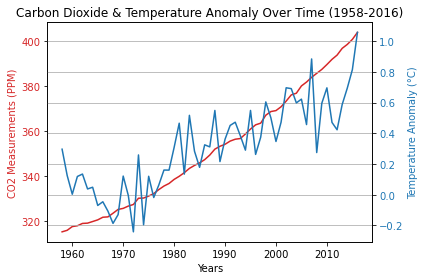

In [11]:
# Need to limit years to overlapping CO2 range,1958 - 2016
trimTempY = tempY.iloc[78:] # Trim first 78 years to line up with CO2
trimCo2Y = co2Y[:-4] # Trim last 4 years to end at 2016
trimCo2X = co2X[:-4] # Trim last 4 years to end at 2016

#Used matplotlib documentation with example to generate a shared graph
fig, ax1 = plt.subplots()

# Plotting CO2 levels
co2Color = 'tab:red'
ax1.set_title("Carbon Dioxide & Temperature Anomaly Over Time (1958-2016)")
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 Measurements (PPM)', color=co2Color)
ax1.plot(trimCo2X, trimCo2Y, color=co2Color)
ax1.tick_params(axis='y', labelcolor=co2Color)

# Plotting temperature anomaly
ax2 = ax1.twinx()

tempColor = 'tab:blue'
ax2.set_ylabel('Temperature Anomaly (\u00B0C)', color=tempColor)
ax2.plot(trimCo2X, trimTempY, color=tempColor)
ax2.tick_params(axis='y', labelcolor=tempColor)

fig.tight_layout() 
plt.grid(True)
plt.show()

## Carbon Dioxide and Sea Ice Minimum Plot

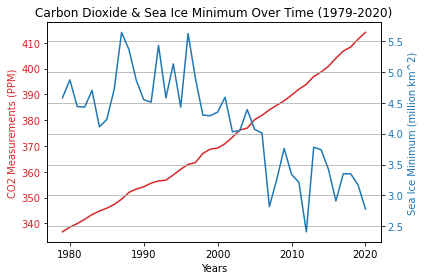

In [12]:
# Trimming CO2 data to line up with Sea ice minimum year range (1979-2020)
trimCo2X = co2X[21:]
trimCo2Y = co2Y[21:]
# Plotting Sea Ice minimum with CO2 Levels using the same method as above
fig, ax1 = plt.subplots()

# CO2 plot
co2Color = 'tab:red'
ax1.set_title("Carbon Dioxide & Sea Ice Minimum Over Time (1979-2020)")
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 Measurements (PPM)', color=co2Color)
ax1.plot(trimCo2X, trimCo2Y, color=co2Color)
ax1.tick_params(axis='y', labelcolor=co2Color)

# Sea Ice minimum plot
ax2 = ax1.twinx()

seaiceColor = 'tab:blue'
ax2.set_ylabel('Sea Ice Minimum (million km^2)', color=seaiceColor)
ax2.plot(trimCo2X, seaiceY, color=seaiceColor)
ax2.tick_params(axis='y', labelcolor=seaiceColor)

fig.tight_layout() 
plt.grid(True)
plt.show()

## Finding Temperature Change Trends Before and After 1930

The 20th century involved rapid expansion following the industrial revolution in the 19th century. By finding seprate trends for before and after 1930, we can explore whether the growth of the world's economy and industries had any effect on temperature change in the last century. The assumption being made is that the level of carbon dioxide emissions is directly increased by the advancement of technology and greater use of energy resources (oil, gas, etc).

#### Separating dataset into two time periods

In [13]:
# NASA temperature anomaly data, goes from 1880 to 2016

# Partitioning tempX and tempY into these date ranges
earlyTempX = tempX[:50] # 1880 to 1930
earlyTempY = tempY[:50] # 1880 to 1930
lateTempX = tempX[50:] # 1930 to 2020
lateTempY = tempY[50:] # 1930 to 2020

#### Fitting Linear Models with scikit-learn

In [14]:
# Starting with 1880 - 1930
earlyTempXCopy = np.array(earlyTempX)
earlyTempXCopy = earlyTempXCopy.reshape(-1,1) # For linear regression x axis must be 2 dimensional

model = LinearRegression()
model.fit(earlyTempXCopy, earlyTempY)

# Repeat for 1930-2016
lateTempXCopy = np.array(lateTempX)
lateTempXCopy = lateTempXCopy.reshape(-1,1) # For linear regression x axis must be 2 dimensional

model2 = LinearRegression()
model2.fit(lateTempXCopy, lateTempY)

LinearRegression()

The polynomial features let us fit a second degree polynomial to the data with the LinearRegression model. Referenced for this section: 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [15]:
# Non-linear model 
poly = PolynomialFeatures(degree=2)
X_transform = poly.fit_transform(lateTempXCopy)

model3 = LinearRegression().fit(X_transform, lateTempY)

#### Plotting

R^2 for 1880-1930:  3.599101122120363e-05
R^2 for 1930-2016, linear:  0.6394000467793297


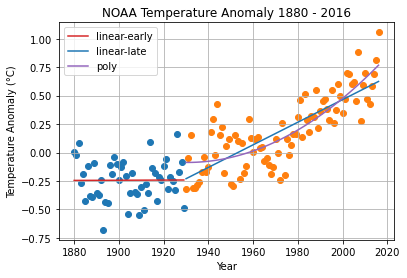

In [16]:
# Plotting different year ranges of data used
plt.title("NOAA Temperature Anomaly 1880 - 2016")
plt.ylabel("Temperature Anomaly (\u00B0C)")
plt.xlabel("Year")
plt.grid(True)

plt.scatter(earlyTempX, earlyTempY)
plt.plot(earlyTempXCopy, model.predict(earlyTempXCopy), color='tab:red', label="linear-early")
plt.scatter(lateTempX, lateTempY)
plt.plot(lateTempXCopy, model2.predict(lateTempXCopy), color='tab:blue', label="linear-late")
plt.plot(lateTempXCopy, model3.predict(X_transform), color='tab:purple', label="poly")

plt.legend()

print("R^2 for 1880-1930: ", model.score(earlyTempXCopy, earlyTempY)) # This will give R^2 for blue data
print("R^2 for 1930-2016, linear: ", model2.score(lateTempXCopy, lateTempY)) # This will give R^2 for orange data

## Forecasting Future Temperature Anomaly Increases

In [17]:
# Range of time to forecast
futureTemp = np.array(range(2017,2103))
futureTemp = futureTemp.reshape(-1,1)

futureX = poly.fit_transform(futureTemp)
futureY = model3.predict(futureX)

tempY_pred2 = model2.predict(futureTemp) # Projecting model onto next 87 years

Polynomial fit forecast:  3.356  degrees celcius
Linear fit forecast:  1.479  degrees celcius


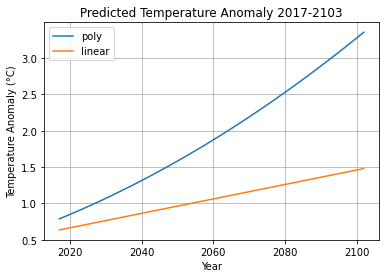

In [18]:
plt.title("Predicted Temperature Anomaly 2017-2103")
plt.ylabel("Temperature Anomaly (\u00B0C)")
plt.xlabel("Year")
plt.grid(True)

plt.plot(futureTemp, futureY, label="poly")
plt.plot(futureTemp, tempY_pred2, label="linear")

plt.legend()
# Seeing a much more aggressive increase in the projection of the temperature temperature anomaly

print("Polynomial fit forecast: ", round(max(futureY), 3), " degrees celcius")
print("Linear fit forecast: ", round(max(tempY_pred2), 3), " degrees celcius")

These forecasts are disparate, but give us an idea of the variation in temperature increases. The real trend may be linear, but it can be seen how much faster the temperature will increase if it ends up increasing polynomially.